# BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
---

In [1]:
from IPython.display import display, Image
import pandas as pd

import torch
from torch.nn.functional import cosine_similarity
from transformers import BertTokenizer, BertForMaskedLM, BertForNextSentencePrediction, BertModel

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Authors: Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova

https://arxiv.org/pdf/1810.04805

Published: 24 May 2019

---
## 1. Introduction

Language model pre-training has proven effective in enhancing various natural language processing (NLP) tasks, such as natural language inference, paraphrasing, named entity recognition, and question answering. Traditional approaches rely on either feature-based methods (e.g., ELMo) or fine-tuning methods (e.g., OpenAI GPT). However, these methods are typically limited by unidirectional language models, which restrict the flow of contextual information during training.

BERT (Bidirectional Encoder Representations from Transformers) addresses this limitation by introducing a masked language model (MLM) pre-training objective. Instead of processing text in a left-to-right manner, BERT randomly masks words and trains the model to predict the masked words based on their surrounding context. This allows BERT to learn deep bidirectional representations, capturing context from both directions.

Additionally, BERT introduces a next sentence prediction (NSP) task, which helps in pre-training text-pair relationships. The key contributions of BERT are:

It demonstrates the importance of bidirectional pre-training, outperforming previous unidirectional models like OpenAI GPT.
It reduces the need for heavily task-specific architectures by using fine-tuning, achieving state-of-the-art performance on various NLP tasks.
By leveraging these innovations, BERT significantly improves upon previous methods and sets new benchmarks in NLP applications.

---
## 2. Related Work

BERT builds upon prior work in language model pre-training. This section briefly reviews the most widely-used approaches.

2.1 Unsupervised Feature-Based Approaches
Early research on language representations focused on learning word embeddings, both with non-neural methods (e.g., Brown clustering) and neural methods (e.g., Word2Vec, GloVe). These approaches pre-train word embeddings using left-to-right language modeling or context-based word discrimination tasks.

Later, sentence and paragraph embeddings were introduced, trained using ranking objectives (e.g., skip-thought vectors) or autoencoder-based methods. ELMo (Peters et al., 2018) advanced contextualized embeddings by extracting features from separate left-to-right and right-to-left language models. However, it was not deeply bidirectional, as the representations were concatenated rather than integrated.

2.2 Unsupervised Fine-Tuning Approaches
An alternative strategy is fine-tuning pre-trained models on specific tasks. Early works only pre-trained word embeddings, but more recent approaches have trained full sentence encoders using large-scale unlabeled text. OpenAI GPT (Radford et al., 2018) fine-tuned a left-to-right Transformer model, achieving strong results on NLP benchmarks. However, it was still unidirectional, limiting its effectiveness for certain tasks.

BERT improves upon these methods by introducing deep bidirectional pre-training, allowing it to capture context from both directions and outperform previous models across multiple NLP tasks.

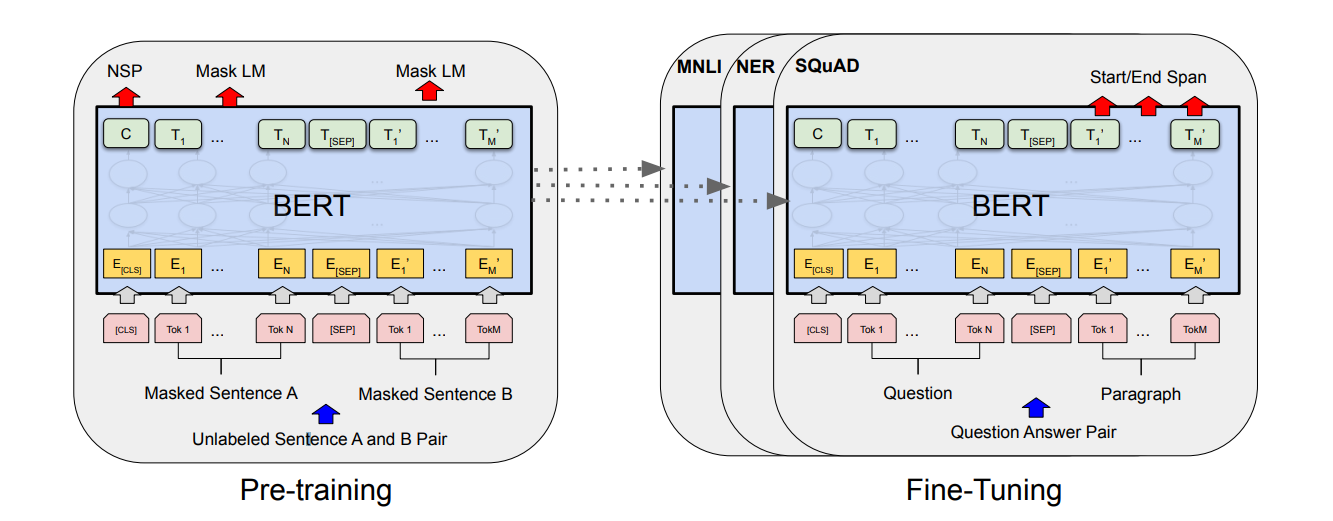

In [2]:
display(Image(filename="figure_one.png"))

Figure 1: Overall pre-training and fine-tuning procedures for BERT. Apart from output layers, the same architectures are used in both pre-training and fine-tuning. The same pre-trained model parameters are used to initialize
models for different down-stream tasks. During fine-tuning, all parameters are fine-tuned. [CLS] is a special
symbol added in front of every input example, and [SEP] is a special separator token (e.g. separating questions/answers)..

---
## 3. BERT

BERT is implemented in two main steps: pre-training and fine-tuning. The model is first pre-trained on large-scale unlabeled text, then fine-tuned on labeled data for specific tasks. Each downstream task has a separate fine-tuned model, but all start from the same pre-trained parameters.

Model Architecture
BERT is based on a multi-layer bidirectional Transformer encoder with two variants:

BERTBASE (L=12, H=768, A=12, 110M parameters)
BERTLARGE (L=24, H=1024, A=16, 340M parameters)
Unlike OpenAI GPT, which uses a unidirectional self-attention mechanism, BERT employs bidirectional self-attention, allowing for a deeper contextual understanding.

BERT uses WordPiece embeddings (30,000 token vocabulary). Each sequence starts with a [CLS] token for classification tasks and [SEP] tokens to separate sentence pairs. Tokens are represented using a combination of token embeddings, segment embeddings, and positional embeddings.

Pre-training BERT
BERT is pre-trained using two unsupervised tasks:

Masked Language Model (MLM)

Instead of traditional left-to-right models, BERT randomly masks 15% of the input tokens and predicts the masked words.
To avoid mismatches during fine-tuning, masked tokens are replaced by [MASK] 80% of the time, by a random token 10%, and remain unchanged 10% of the time.
This allows BERT to learn deep bidirectional representations.
Next Sentence Prediction (NSP)

Trains the model to understand relationships between sentences.
For each sentence pair (A, B):
50% of the time, B is the actual next sentence (IsNext).
50% of the time, B is a random sentence (NotNext).
This task improves performance on tasks like Question Answering (QA) and Natural Language Inference (NLI).
Pre-training Data
BERT is trained on two large datasets:

BooksCorpus (800M words)
English Wikipedia (2,500M words, only text passages)
A document-level corpus is used to capture long-range dependencies, unlike shuffled sentence datasets.

Fine-Tuning BERT
Fine-tuning is straightforward due to BERT’s self-attention mechanism, which supports both single-text and text-pair tasks.

Sentence pairs (e.g., question-answer, hypothesis-premise) are concatenated before being processed.
Token-level tasks (e.g., named entity recognition, question answering) use token representations.
Classification tasks (e.g., sentiment analysis) use the [CLS] token’s final representation.
Fine-tuning is computationally efficient—it takes under 1 hour on a TPU or a few hours on a GPU.

BERT's pre-training and fine-tuning framework enables state-of-the-art performance across a wide range of NLP tasks with minimal task-specific modifications.

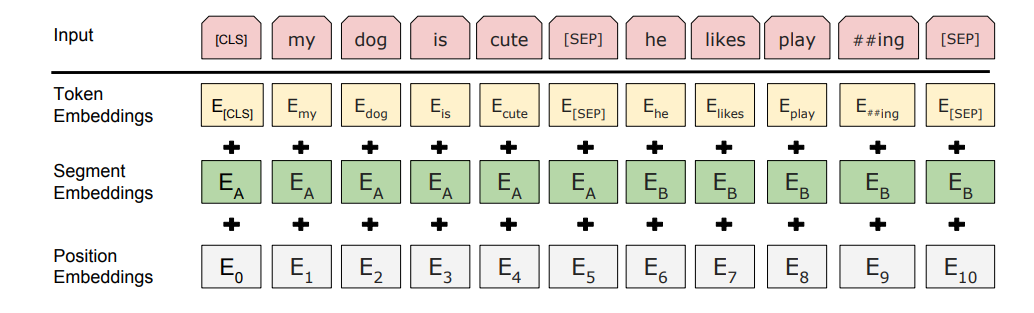

In [3]:
display(Image(filename="figure_two.png"))

Figure 2: BERT input representation. The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.

---
## 4 Experiments
GLUE Benchmark: BERT outperforms previous models by 4.5%–7.0%, scoring 80.5 on the leaderboard (vs. OpenAI GPT’s 72.8).

SQuAD v1.1 (QA): BERT predicts answer spans using start/end vectors, achieving +1.5 F1 improvement over the top ensemble system.

SQuAD v2.0: Handles unanswerable questions using [CLS] as a no-answer indicator, improving F1 by 5.1 points.

SWAG (Commonsense Reasoning): BERT surpasses ESIM+ELMo by 27.1% and OpenAI GPT by 8.3%.

Conclusion
BERT sets new state-of-the-art results across major NLP tasks, proving the effectiveness of deep bidirectional pre-training.

In [4]:
data = {
    "System": ["Pre-OpenAI SOTA", "BiLSTM+ELMo+Attn", "OpenAI GPT", "BERTBASE", "BERTLARGE"],
    "MNLI-(m/mm)": ["80.6/80.1", "76.4/76.1", "82.1/81.4", "84.6/83.4", "86.7/85.9"],
    "QQP": [66.1, 64.8, 70.3, 71.2, 72.1],
    "QNLI": [82.3, 79.8, 87.4, 90.5, 92.7],
    "SST-2": [93.2, 90.4, 91.3, 93.5, 94.9],
    "CoLA": [35.0, 36.0, 45.4, 52.1, 60.5],
    "STS-B": [81.0, 73.3, 80.0, 85.8, 86.5],
    "MRPC": [86.0, 84.9, 82.3, 88.9, 89.3],
    "RTE": [61.7, 56.8, 56.0, 66.4, 70.1],
    "Average": [74.0, 71.0, 75.1, 79.6, 82.1]
}

df = pd.DataFrame(data)

display(df)

,System,MNLI-(m/mm),QQP,QNLI,SST-2,CoLA,STS-B,MRPC,RTE,Average
0,Pre-OpenAI SOTA,80.6/80.1,66.1,82.3,93.2,35.0,81.0,86.0,61.7,74.0
1,BiLSTM+ELMo+Attn,76.4/76.1,64.8,79.8,90.4,36.0,73.3,84.9,56.8,71.0
2,OpenAI GPT,82.1/81.4,70.3,87.4,91.3,45.4,80.0,82.3,56.0,75.1
3,BERTBASE,84.6/83.4,71.2,90.5,93.5,52.1,85.8,88.9,66.4,79.6
4,BERTLARGE,86.7/85.9,72.1,92.7,94.9,60.5,86.5,89.3,70.1,82.1


Table 1: GLUE Test results, scored by the evaluation server (https://gluebenchmark.com/leaderboard).
The number below each task denotes the number of training examples. The “Average” column is slightly different
than the official GLUE score, since we exclude the problematic WNLI set.8 BERT and OpenAI GPT are singlemodel, single task. F1 scores are reported for QQP and MRPC, Spearman correlations are reported for STS-B, and
accuracy scores are reported for the other tasks. We exclude entries that use BERT as one of their components.

### --- 3. Matthews Correlation Coefficient (MCC)
Sometimes used in **binary classification tasks** like **MRPC and RTE**.

$$
MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}
$$

This metric considers **true positives, true negatives, false positives, and false negatives**, providing a **balanced score even in imbalanced datasets**.

### --- Average Score
The **Average** column represents the **mean performance across all tasks**.

$$
\text{Average} = \frac{\sum \text{Task Scores}}{\text{Total Number of Tasks}}
$$

---
## 5. Ablation Studies

Effect of Pre-training Tasks:

Removing Next Sentence Prediction (NSP) reduces performance on QNLI, MNLI, and SQuAD.
Using only left-to-right (LTR) training degrades performance, especially for token-level tasks like SQuAD.
Bidirectional training significantly improves results compared to separate LTR and RTL models.
Effect of Model Size:

Larger models improve accuracy across all tasks, even for small datasets like MRPC.
BERTBASE (110M) vs. BERTLARGE (340M): Larger models lead to better fine-tuning performance.
Scaling pre-trained models benefits even small-scale tasks.
Feature-Based vs. Fine-Tuning Approach:

Fine-tuning achieves the best results, but feature-based BERT embeddings also perform well.
On Named Entity Recognition (NER), extracting top four hidden layers achieves results close to full fine-tuning (only 0.3 F1 lower).

In [5]:
data = {
    "Tasks": ["BERTBASE", "No NSP", "LTR & No NSP", "+ BiLSTM"],
    "MNLI-m (Acc)": [84.4, 83.9, 82.1, 82.1],
    "QNLI (Acc)": [88.4, 84.9, 84.3, 84.1],
    "MRPC (Acc)": [86.7, 86.5, 77.5, 75.7],
    "SST-2 (Acc)": [92.7, 92.6, 92.1, 91.6],
    "SQuAD (F1)": [88.5, 87.9, 77.8, 84.9]
}

df = pd.DataFrame(data)

display(df)

,Tasks,MNLI-m (Acc),QNLI (Acc),MRPC (Acc),SST-2 (Acc),SQuAD (F1)
0,BERTBASE,84.4,88.4,86.7,92.7,88.5
1,No NSP,83.9,84.9,86.5,92.6,87.9
2,LTR & No NSP,82.1,84.3,77.5,92.1,77.8
3,+ BiLSTM,82.1,84.1,75.7,91.6,84.9


Table 2: Ablation over the pre-training tasks using the
BERTBASE architecture. “No NSP” is trained without
the next sentence prediction task. “LTR & No NSP” is
trained as a left-to-right LM without the next sentence
prediction, like OpenAI GPT. “+ BiLSTM” adds a randomly initialized BiLSTM on top of the “LTR + No
NSP” model during fine-tuning.

### --- Accuracy (Acc)
Used for **MNLI-m, QNLI, MRPC, SST-2**.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Examples}}
$$

Accuracy measures the **percentage of correctly predicted labels** out of all examples in the dataset.

### --- F1 Score (F1)
Used for **SQuAD**.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


- **Precision (Positive Predictive Value)**:

  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$

- **Recall (Sensitivity)**:

  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$

F1 Score is the **harmonic mean of Precision and Recall**, making it a balanced evaluation metric for **tasks like SQuAD (question-answering)**.

## Extended BERT Experiment: MLM, NSP & Sentence Similarity

This notebook extends **Masked Language Modeling (MLM)** and **Next Sentence Prediction (NSP)** with additional experiments:

- **Masked Language Modeling (MLM)** → Predict multiple masked words in a sentence.
- **Next Sentence Prediction (NSP)** → Classify sentence pairs as related or not.
- **Sentence Similarity** → Compute sentence embeddings and cosine similarity.

---

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


---
## Load Pre-trained BERT Models and Tokenizer

In [7]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model_mlm = BertForMaskedLM.from_pretrained("bert-base-uncased").to(device)
model_nsp = BertForNextSentencePrediction.from_pretrained("bert-base-uncased").to(device)
model_embed = BertModel.from_pretrained("bert-base-uncased").to(device)

print('✅ BERT models loaded successfully!')

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

✅ BERT models loaded successfully!


## Experiment 1: Multi-Word Masked Language Modeling (MLM)

In [8]:
text = "BERT is a [MASK] language [MASK] for NLP tasks."

inputs = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model_mlm(**inputs)

mask_indices = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
predicted_tokens = [tokenizer.decode(torch.argmax(outputs.logits[0, idx])) for idx in mask_indices]

print(f'🔍 Predicted words: {predicted_tokens}')

🔍 Predicted words: ['programming', 'used']


## Experiment 2: Next Sentence Prediction (NSP)

In [9]:
sentence_a = "BERT is a powerful model for NLP."
sentence_b_correct = "It is widely used in AI applications."
sentence_b_incorrect = "I love playing soccer on weekends."

inputs_correct = tokenizer(sentence_a, sentence_b_correct, return_tensors="pt").to(device)
inputs_incorrect = tokenizer(sentence_a, sentence_b_incorrect, return_tensors="pt").to(device)

with torch.no_grad():
    logits_correct = model_nsp(**inputs_correct).logits
    logits_incorrect = model_nsp(**inputs_incorrect).logits

prob_correct = torch.softmax(logits_correct, dim=-1)[0][0].item()
prob_incorrect = torch.softmax(logits_incorrect, dim=-1)[0][0].item()

print(f'✅ NSP probability (correct pair): {prob_correct:.2f}')
print(f'❌ NSP probability (incorrect pair): {prob_incorrect:.2f}')

✅ NSP probability (correct pair): 1.00
❌ NSP probability (incorrect pair): 0.00


## Experiment 3: Sentence Similarity Using BERT Embeddings

In [10]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model_embed(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze()

sentence_1 = "Deep learning is a subset of machine learning."
sentence_2 = "Neural networks are used in deep learning."
sentence_3 = "Cats love to chase mice."

embedding_1 = get_embedding(sentence_1)
embedding_2 = get_embedding(sentence_2)
embedding_3 = get_embedding(sentence_3)

similarity_1_2 = cosine_similarity(embedding_1.unsqueeze(0), embedding_2.unsqueeze(0)).item()
similarity_1_3 = cosine_similarity(embedding_1.unsqueeze(0), embedding_3.unsqueeze(0)).item()

print(f'🔗 Sentence Similarity (1 & 2): {similarity_1_2:.2f}')
print(f'❌ Sentence Similarity (1 & 3): {similarity_1_3:.2f}')

🔗 Sentence Similarity (1 & 2): 0.92
❌ Sentence Similarity (1 & 3): 0.76


## Experiment 4: Predicting Masked Words using BERT's Masked Language Model (MLM)

In [11]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

model.eval()

text = "BERT is a [MASK] model for natural language processing."

inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

mask_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
predicted_token_id = torch.argmax(outputs.logits[0, mask_index], dim=-1)
predicted_word = tokenizer.decode(predicted_token_id)

print(f"🔍 Predicted word: {predicted_word}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


🔍 Predicted word: mathematical


## Experiment 5: Next Sentence Prediction (NSP) with BERT – Understanding Sentence Relationships 

In [12]:
model_nsp = BertForNextSentencePrediction.from_pretrained("bert-base-uncased")

sentence_a = "BERT is a powerful language model."
sentence_b_correct = "It is widely used in deep learning applications."
sentence_b_incorrect = "I love playing football during the summer."

inputs_correct = tokenizer(sentence_a, sentence_b_correct, return_tensors="pt")
inputs_incorrect = tokenizer(sentence_a, sentence_b_incorrect, return_tensors="pt")

with torch.no_grad():
    logits_correct = model_nsp(**inputs_correct).logits
    logits_incorrect = model_nsp(**inputs_incorrect).logits

prob_correct = torch.softmax(logits_correct, dim=-1)[0][0].item()
prob_incorrect = torch.softmax(logits_incorrect, dim=-1)[0][0].item()

print(f"✅ NSP probability (correct sentence pair): {prob_correct:.2f}")
print(f"❌ NSP probability (incorrect sentence pair): {prob_incorrect:.2f}")

✅ NSP probability (correct sentence pair): 1.00
❌ NSP probability (incorrect sentence pair): 0.00


---
## 6. Conclusion
Recent advances in transfer learning with language models show that unsupervised pre-training is essential for NLP. While previous models benefited low-resource tasks using unidirectional architectures, BERT extends this to deep bidirectional architectures, enabling a single pre-trained model to excel across diverse NLP tasks.

---
## References

- Alan Akbik, Duncan Blythe, and Roland Vollgraf. (2018). *Contextual string embeddings for sequence labeling*. In Proceedings of the 27th International Conference on Computational Linguistics, 1638–1649.  
- Rami Al-Rfou, Dokook Choe, Noah Constant, Mandy Guo, and Llion Jones. (2018). *Character-level language modeling with deeper self-attention*. arXiv preprint [arXiv:1808.04444](https://arxiv.org/abs/1808.04444).  
- Rie Kubota Ando and Tong Zhang. (2005). *A framework for learning predictive structures from multiple tasks and unlabeled data*. Journal of Machine Learning Research, 6(Nov):1817–1853.  
- Luisa Bentivogli, Bernardo Magnini, Ido Dagan, Hoa Trang Dang, and Danilo Giampiccolo. (2009). *The fifth PASCAL recognizing textual entailment challenge*. In TAC. NIST.  
- John Blitzer, Ryan McDonald, and Fernando Pereira. (2006). *Domain adaptation with structural correspondence learning*. In Proceedings of the 2006 Conference on Empirical Methods in Natural Language Processing, 120–128. Association for Computational Linguistics.  
- Samuel R. Bowman, Gabor Angeli, Christopher Potts, and Christopher D. Manning. (2015). *A large annotated corpus for learning natural language inference*. In EMNLP. Association for Computational Linguistics.  
- Peter F Brown, Peter V Desouza, Robert L Mercer, Vincent J Della Pietra, and Jenifer C Lai. (1992). *Class-based n-gram models of natural language*. Computational Linguistics, 18(4):467–479.  
- Daniel Cer, Mona Diab, Eneko Agirre, Inigo Lopez-Gazpio, and Lucia Specia. (2017). *Semeval-2017 task 1: Semantic textual similarity multilingual and crosslingual focused evaluation*. In Proceedings of the 11th International Workshop on Semantic Evaluation (SemEval-2017), 1–14. Association for Computational Linguistics.  
- Ciprian Chelba, Tomas Mikolov, Mike Schuster, Qi Ge, Thorsten Brants, Phillipp Koehn, and Tony Robinson. (2013). *One billion word benchmark for measuring progress in statistical language modeling*. arXiv preprint [arXiv:1312.3005](https://arxiv.org/abs/1312.3005).  
- Christopher Clark and Matt Gardner. (2018). *Simple and effective multi-paragraph reading comprehension*. In ACL.  
- Kevin Clark, Minh-Thang Luong, Christopher D Manning, and Quoc Le. (2018). *Semi-supervised sequence modeling with cross-view training*. In Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing, 1914–1925.  
- Ronan Collobert and Jason Weston. (2008). *A unified architecture for natural language processing: Deep neural networks with multitask learning*. In Proceedings of the 25th International Conference on Machine Learning, 160–167. ACM.  
- Alexis Conneau, Douwe Kiela, Holger Schwenk, Loïc Barrault, and Antoine Bordes. (2017). *Supervised learning of universal sentence representations from natural language inference data*. In Proceedings of the 2017 Conference on Empirical Methods in Natural Language Processing, 670–680. Association for Computational Linguistics.  
- Andrew M Dai and Quoc V Le. (2015). *Semi-supervised sequence learning*. In Advances in Neural Information Processing Systems, 3079–3087.  
- William B Dolan and Chris Brockett. (2005). *Automatically constructing a corpus of sentential paraphrases*. In Proceedings of the Third International Workshop on Paraphrasing (IWP2005).  
- Jeffrey Pennington, Richard Socher, and Christopher D. Manning. (2014). *GloVe: Global vectors for word representation*. In Empirical Methods in Natural Language Processing (EMNLP), 1532–1543.  
- Matthew Peters, Mark Neumann, Mohit Iyyer, Matt Gardner, Christopher Clark, Kenton Lee, and Luke Zettlemoyer. (2018a). *Deep contextualized word representations*. In NAACL.  
- Alec Radford, Karthik Narasimhan, Tim Salimans, and Ilya Sutskever. (2018). *Improving language understanding with unsupervised learning*. Technical report, OpenAI.  
- Pranav Rajpurkar, Jian Zhang, Konstantin Lopyrev, and Percy Liang. (2016). *SQuAD: 100,000+ questions for machine comprehension of text*. In Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing, 2383–2392.  
- Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and Illia Polosukhin. (2017). *Attention is all you need*. In Advances in Neural Information Processing Systems, 6000–6010.  
- Alex Wang, Amanpreet Singh, Julian Michael, Felix Hill, Omer Levy, and Samuel Bowman. (2018). *GLUE: A multi-task benchmark and analysis platform*. 